In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df = df.rename(columns={'Unnamed: 0':'City'})

In [5]:
df1 = df.iloc[0:,1:]
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
sc = StandardScaler()

In [8]:
x = sc.fit_transform(df1)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
km = KMeans()

In [10]:
y = km.fit_predict(x)

In [11]:
km.cluster_centers_

array([[ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-0.85920562, -1.08193841,  0.38103786, -0.70087286],
       [-0.18810919, -0.25723053, -0.09673573, -0.06318276],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18293457, -1.19708982, -1.27640705, -1.16552107],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [-0.73937759, -0.24557553,  1.37550481, -0.50225147],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [12]:
x = pd.DataFrame(x)
x['cluster'] = y
x.head()

,0,1,2,3,cluster
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,7
2,0.072361,1.493817,1.009122,1.053466,5
3,0.234708,0.233212,-1.084492,-0.186794,2
4,0.281093,1.275635,1.776781,2.088814,0


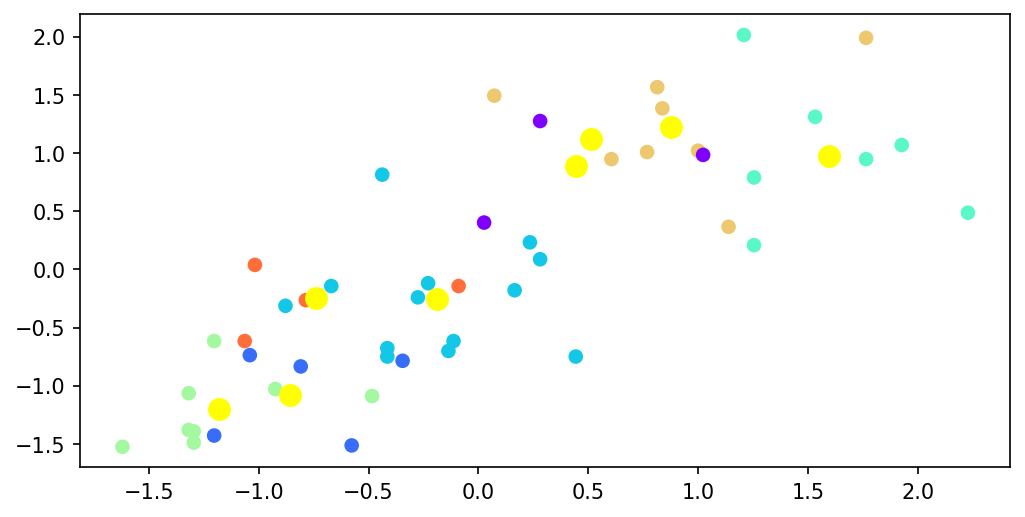

In [13]:
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=150
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=x['cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='yellow',s=100)

In [14]:
x1 = x.iloc[:,:-1]

In [15]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters = i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.211423884532635,
 44.89364305490985,
 41.281285837291016,
 35.10395828630003,
 32.18535333336167,
 30.169955878604156,
 24.802424745523805,
 22.44466254049854,
 20.908027489232584,
 19.743883469879094,
 17.856556761479556,
 17.197235119516904,
 16.62507911886358,
 14.528549982148604,
 13.770685017093328,
 12.771875542663796,
 12.035218768924311,
 11.070202712074419,
 10.733474116524276,
 9.87348957930898]

Text(0, 0.5, 'wcss')

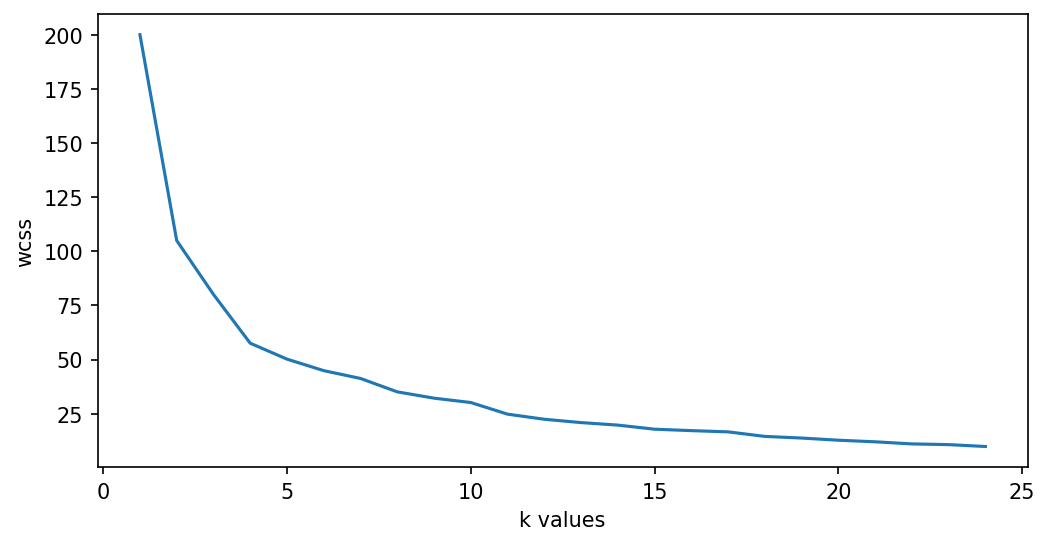

In [16]:
plt.plot(range(1,25),wcss)
plt.xlabel('k values')
plt.ylabel('wcss')

In [17]:
km = KMeans(n_clusters=4)
y=km.fit_predict(x1)
y

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 1, 3, 0, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [18]:
x1['cluster'] = y
x1

,0,1,2,3,cluster
0,1.255179,0.790787,-0.526195,-0.003451,2
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,2
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,2


In [19]:
km.cluster_centers_

array([[-0.51290944, -0.41277681,  0.53292755, -0.27878259],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.98483178, -1.14153431, -0.99725843, -1.01543161]])

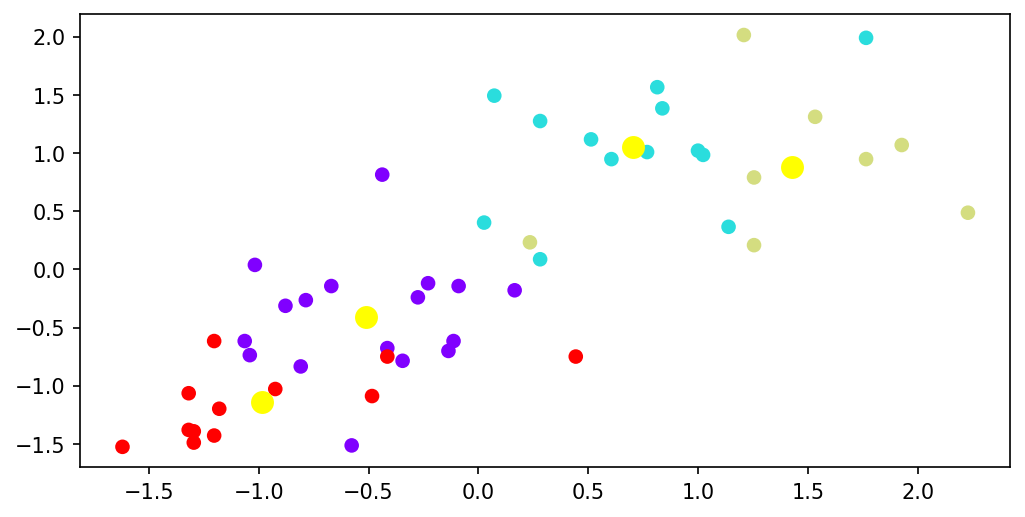

In [20]:
plt.scatter(x1.iloc[:,0], x.iloc[:,1], c =x1['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c ='yellow', s =100)

In [21]:
df['Y']=y
df

,City,Murder,Assault,UrbanPop,Rape,Y
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [22]:
df.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape
Y,,,,
0,5.576471,136.705882,73.176471,18.647059
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,3.541667,76.583333,51.250000,11.816667


#Inference: 

Cluster 0 has the lowest rate of Murder, Assault and Rape with less Urban population 

Cluster 1 has the high rate of Murder, Assault and Rape with high Population

Cluster 2 has moderate rate of Assault and Rape with low Murder rate and high Population

Cluster 3 has the highest rate of Murder, Assault and Rape with low Urban Population.

In [23]:
df[df['Y']==0]

,City,Murder,Assault,UrbanPop,Rape,Y
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
26,Nebraska,4.3,102,62,16.5,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0


In [24]:
df[df['Y']==1]

,City,Murder,Assault,UrbanPop,Rape,Y
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [25]:
df[df['Y']==2]

,City,Murder,Assault,UrbanPop,Rape,Y
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [26]:
df[df['Y']==3]

,City,Murder,Assault,UrbanPop,Rape,Y
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
